In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Pandas version :\t\t', pd.__version__)
print('Matplotlib version:\t\t', matplotlib.__version__)
print('Seaborn version :\t\t', sns.__version__)
print('Statsmodels version:\t\t', sm.__version__)
print('Sklearn version :\t\t',sklearn.__version__)

Pandas version :		 1.4.2
Matplotlib version:		 3.5.1
Seaborn version :		 0.11.2
Statsmodels version:		 0.13.2
Sklearn version :		 1.1.1


## <center> I. Load and Preview the data </center> ##

In [3]:
d_house = pd.read_csv('train.csv')
d_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

>__The data has 1460 rows and 81 columns. In which there are many columns with different values, not equal to each other (empty data)__

In [4]:
d_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


> __The difference between min and max values of some columns is very large. Eg: LotArea, etc.__

In [5]:
# Drop Id columns so it's unnecessary
d_house=d_house.drop(['Id'], axis=1)

In [6]:
d_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## <center> II. Processing and normalizing data </center>

> Check dtype of Each Column
>> _There are many columns with numeric values and many columns with string values._</br>
>>_The "nan" value is evenly distributed in each type, so there will be a separate normalization for each data type._

In [7]:
# Create new dataframe with only 'object' data type
obj_df = d_house.select_dtypes(include='object')
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
# Create new dataframe with only 'numeric' data type
num_df = d_house.select_dtypes(include=['float64', 'int64'])
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Replace the corresponding NaN value for each data type. 'non' for object and median for numeric
def replace_nan(df, typ = 'non'):
    checkNan = df.isna().sum()
    checkNan=checkNan.sort_values()[::-1][:25]
    nan_col = checkNan.keys()[checkNan>0].tolist()
    for it0 in nan_col:
        if typ != 'non':
            df[it0].fillna(df[it0].median(), inplace=True)
        else:
            df[it0].fillna(typ, inplace=True)
    return df

In [10]:
num_df = replace_nan(num_df, typ='')
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
# Count the 'YearBuilt' Column
num_df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [12]:
# Count the 'YrSold' Column
num_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [13]:
# chuyen namw xay dung ve so nam

In [14]:
# Because the time to buy and sell a house can be considered as the time to sell that house. so we create variable 'SellTime' to represent
num_df['SellTime'] = (num_df['YrSold'] - num_df['YearBuilt'])
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SellTime
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,5
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,31
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,7
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,91
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,8


In [15]:
# Drop 2 columns ['YearBuilt', 'YrSold'] after create 'SellTime' column
num_df=num_df.drop(['YearBuilt', 'YrSold'], axis=1)
numeric_col = num_df.columns.tolist()

In [16]:
# Find and convert Nan values in Objects columns to 'non'
obj_df = replace_nan(obj_df, typ='non')
object_col = obj_df.columns.tolist()
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,non,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
1,RL,Pave,non,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
2,RL,Pave,non,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
3,RL,Pave,non,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,non,non,non,WD,Abnorml
4,RL,Pave,non,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal


In [17]:
print(sorted(object_col))

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [18]:
# Combine 2 new dataframe into d_house after 'nan' processing and create new column (SellTime)
d_house=pd.concat([num_df, obj_df], axis=1, join='inner')
d_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,Detchd,Unf,TA,TA,Y,non,non,non,WD,Abnorml
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,Attchd,RFn,TA,TA,Y,non,non,non,WD,Normal


In [19]:
# 'SalePrice' is the Target variable, so consider the relationship between it and other variables
# Correlation matrix
numeric_col.remove('SalePrice')
numeric_col.insert(0, 'SalePrice')
corr = d_house[numeric_col].corr()
corr

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SellTime
SalePrice,1.000000,-0.084284,0.334771,0.263843,0.790982,-0.077856,0.507101,0.472614,0.386420,-0.011378,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.523350
MSSubClass,-0.084284,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.040581,0.023573,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.028746
LotFrontage,0.334771,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178469,0.214367,0.042463,...,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,-0.116223
LotArea,0.263843,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103321,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014832
OverallQual,0.790982,0.032628,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.572629
OverallCond,-0.077856,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.125694,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.377325
YearRemodAdd,0.507101,0.040581,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,-0.590360
MasVnrArea,0.472614,0.023573,0.178469,0.103321,0.407252,-0.125694,0.176529,1.000000,0.261256,-0.071330,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.311479
BsmtFinSF1,0.386420,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.128451,0.261256,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,-0.248483
BsmtFinSF2,-0.011378,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.067759,-0.071330,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.050422


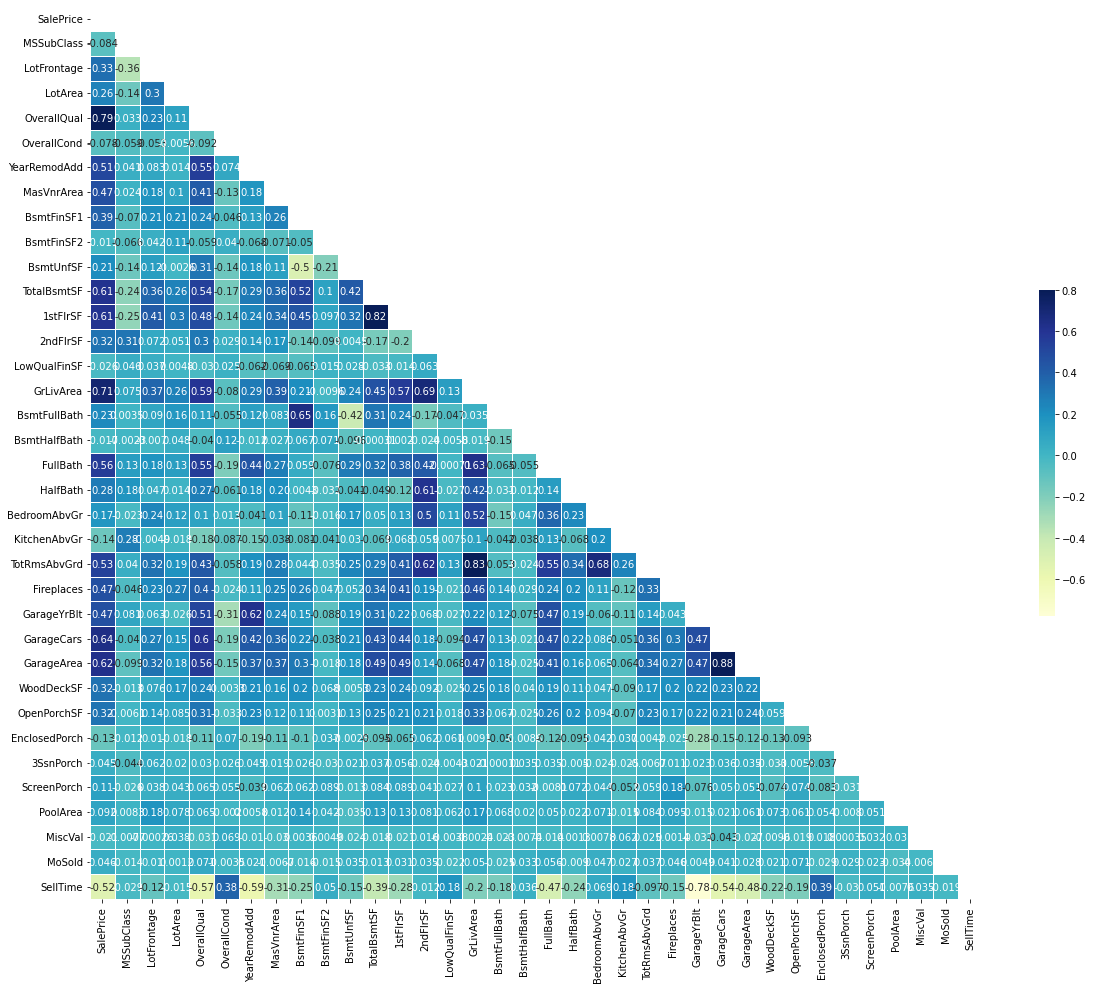

In [20]:
# Visualization the Correlation matrix 
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .3},annot=True)
plt.show()

>>_It can be seen that there are many variables that are highly correlated with 'SalePrice' and vice versa.</br> To decide how to handle those variables, we will apply some techniques and expertise_

In [21]:
# Show variables have correlation >= 0.5 with 'SalePrice'
corr[corr['SalePrice']>=0.5]

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SellTime
SalePrice,1.000000,-0.084284,0.334771,0.263843,0.790982,-0.077856,0.507101,0.472614,0.386420,-0.011378,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.523350
OverallQual,0.790982,0.032628,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.572629
YearRemodAdd,0.507101,0.040581,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,-0.590360
TotalBsmtSF,0.613581,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.291066,0.360067,0.522396,0.104810,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.391498
1stFlrSF,0.605852,-0.251758,0.413773,0.299475,0.476224,-0.144203,0.240379,0.339850,0.445863,0.097117,...,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.282143
GrLivArea,0.708624,0.074853,0.368007,0.263116,0.593007,-0.079686,0.287389,0.388052,0.208171,-0.009640,...,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.200302
FullBath,0.560664,0.131608,0.180534,0.126031,0.550600,-0.194149,0.439046,0.272999,0.058543,-0.076444,...,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.468403
TotRmsAbvGrd,0.533723,0.040380,0.320518,0.190015,0.427452,-0.057583,0.191740,0.279568,0.044316,-0.035227,...,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.096955
GarageCars,0.640409,-0.040110,0.269539,0.154871,0.600671,-0.185758,0.420622,0.361945,0.224054,-0.038264,...,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.538727
GarageArea,0.623431,-0.098672,0.323511,0.180403,0.562022,-0.151521,0.371600,0.370884,0.296970,-0.018227,...,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.479408


## <center> III. Data cleaning </center> ##

>> * We proceed to find and delete columns that are not related or strongly related to cbv to avoid multicollinearity</br>
>>* Find and delete columns with few values but high value difference
>>* Outliers removal

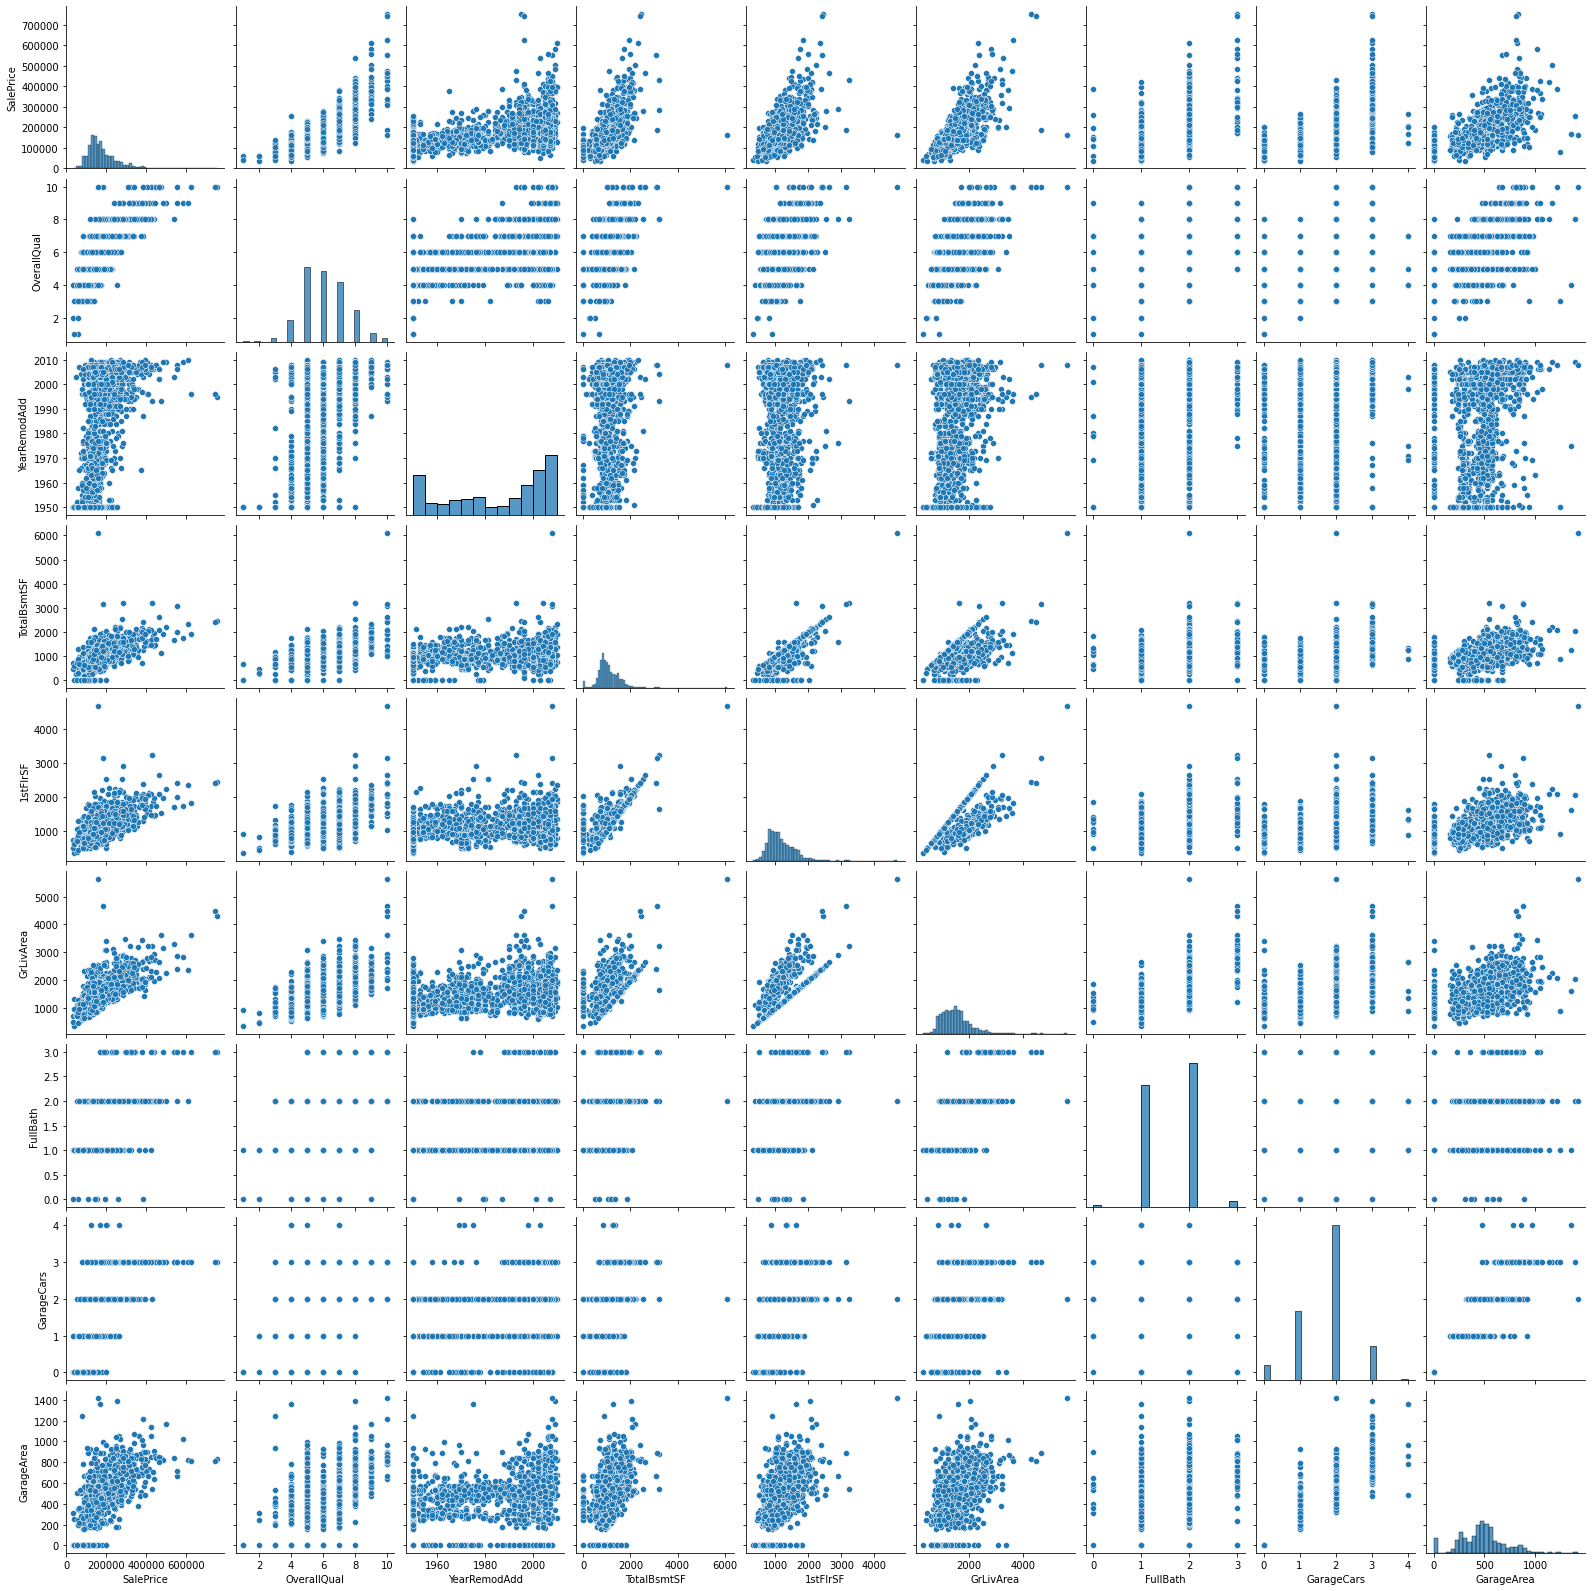

In [22]:
cols = ['SalePrice', 'OverallQual', 'YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','GarageCars','GarageArea']
sns.pairplot(d_house[cols], height = 2.5)
plt.show()

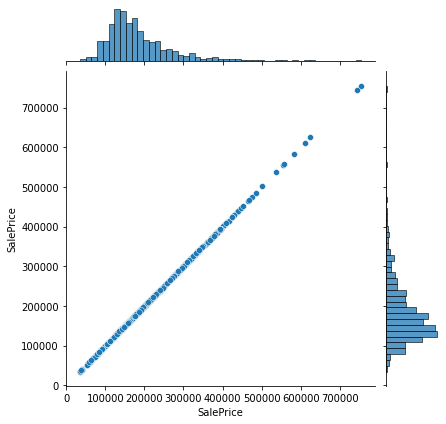

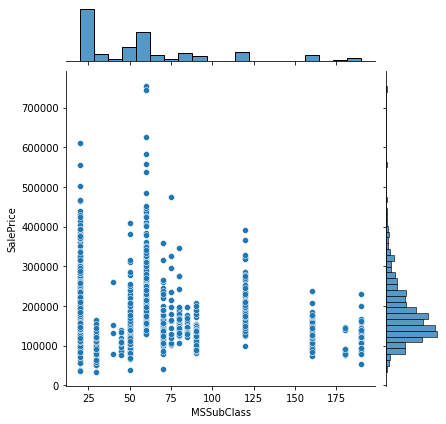

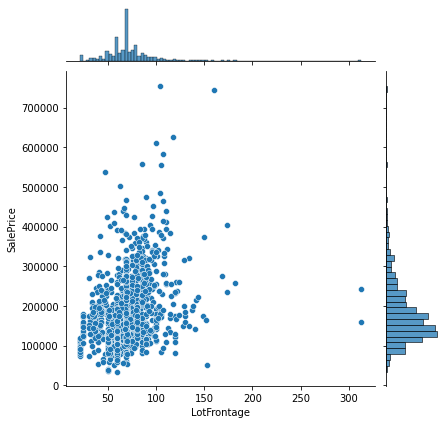

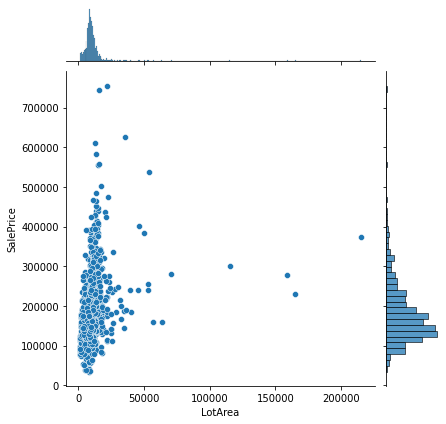

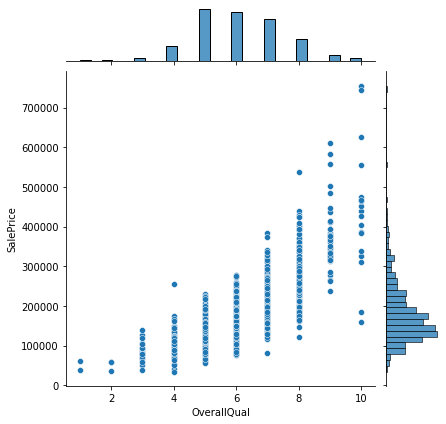

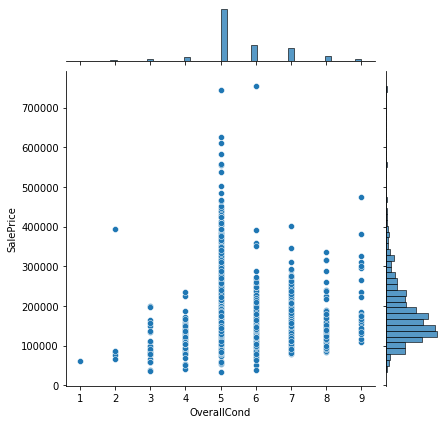

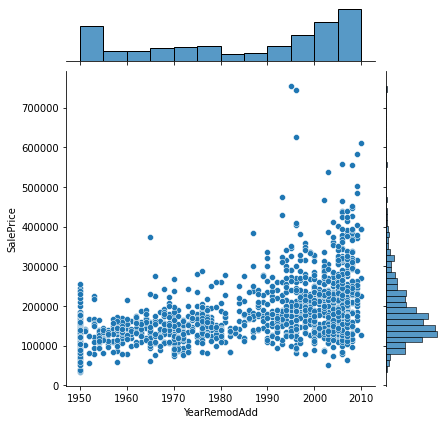

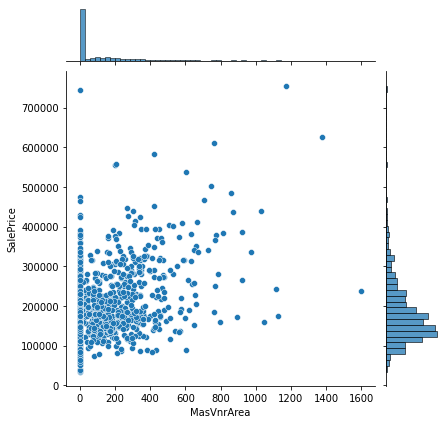

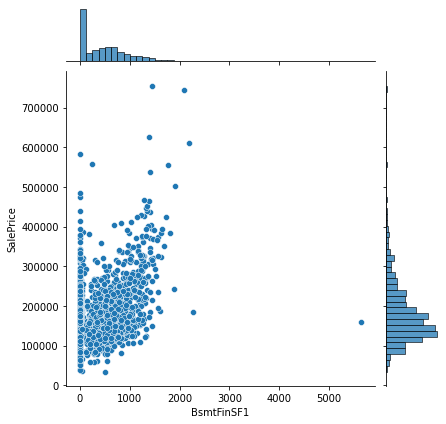

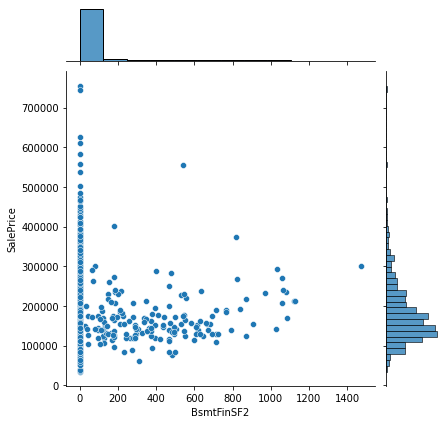

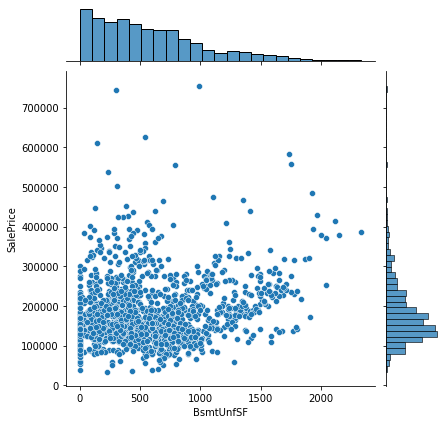

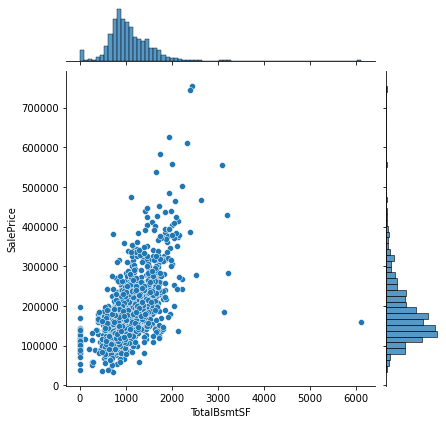

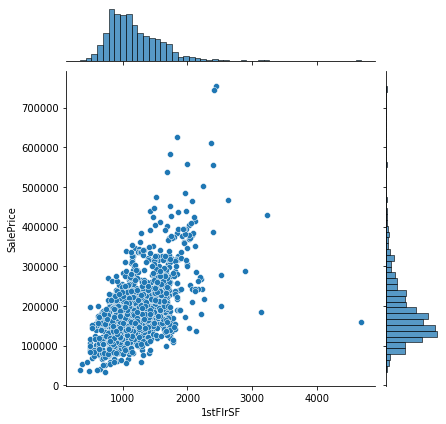

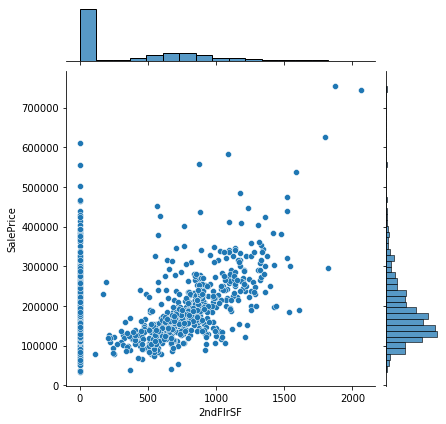

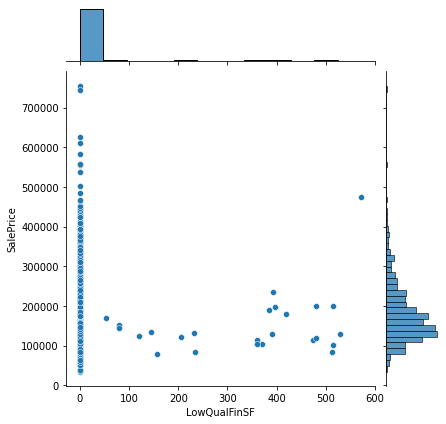

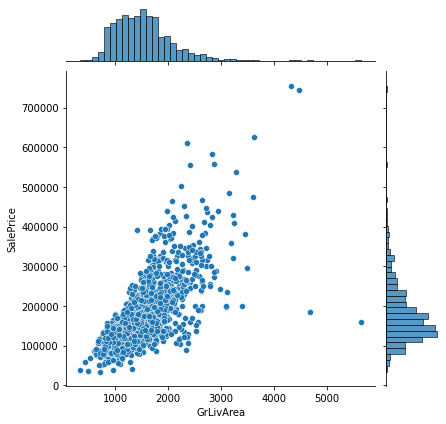

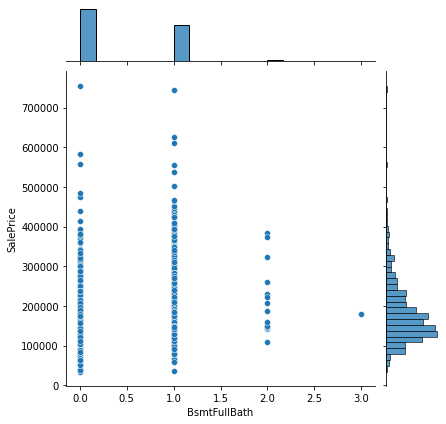

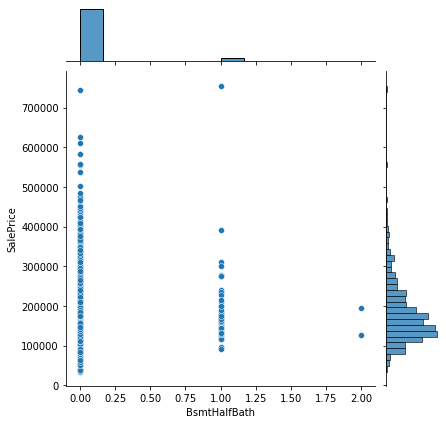

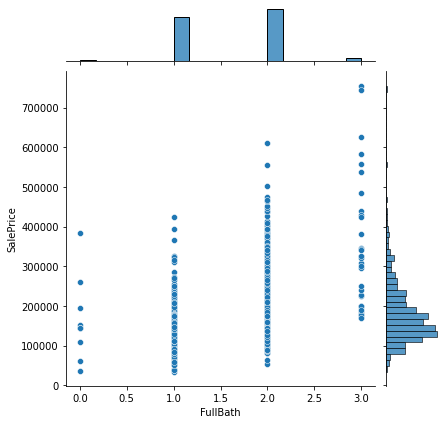

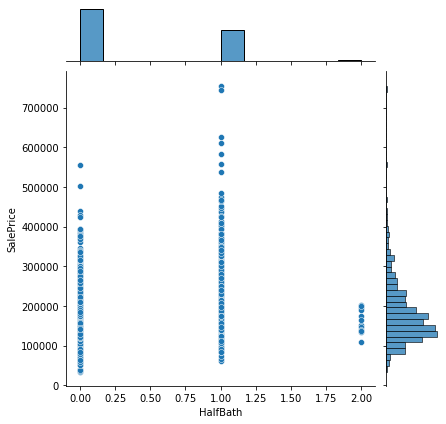

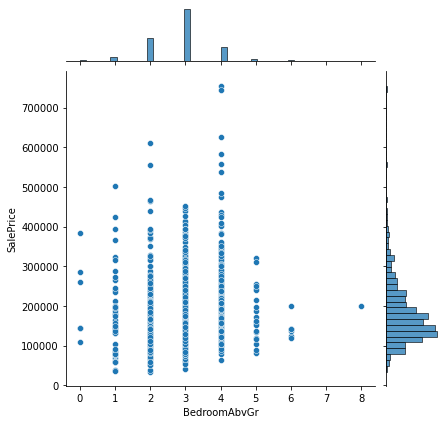

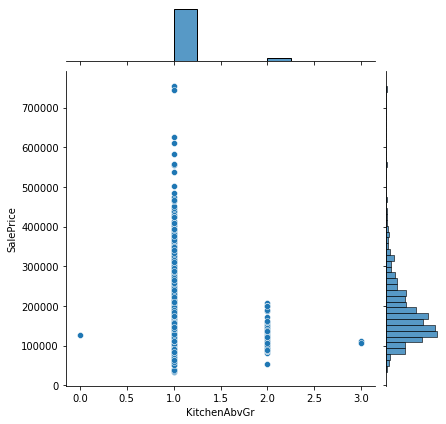

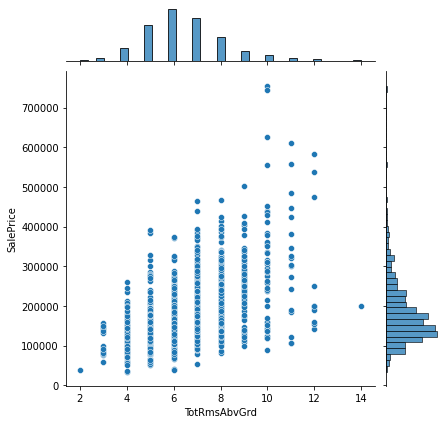

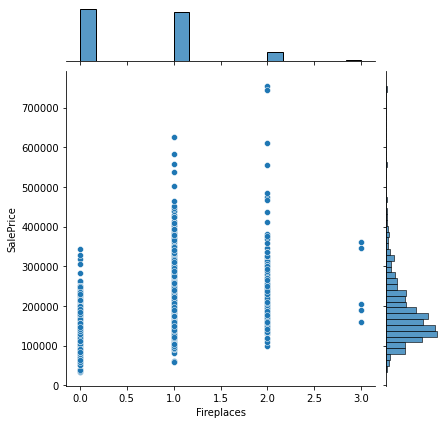

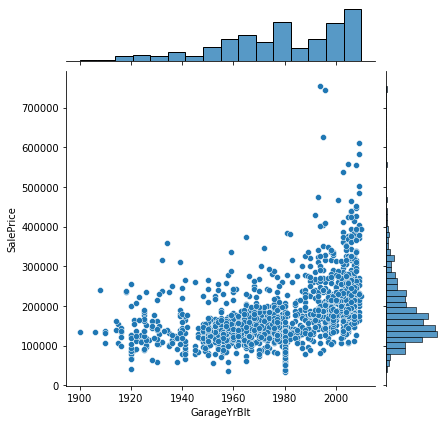

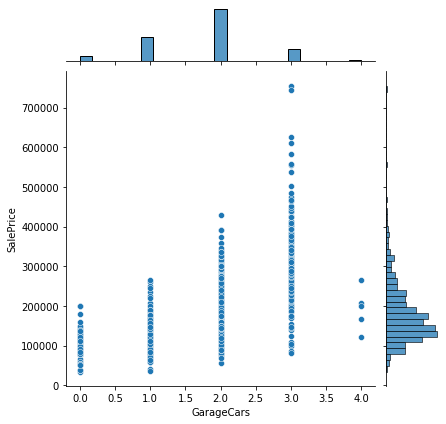

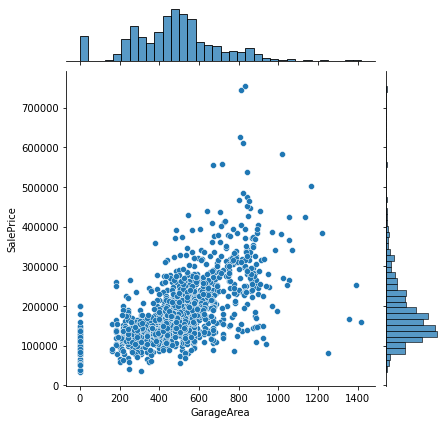

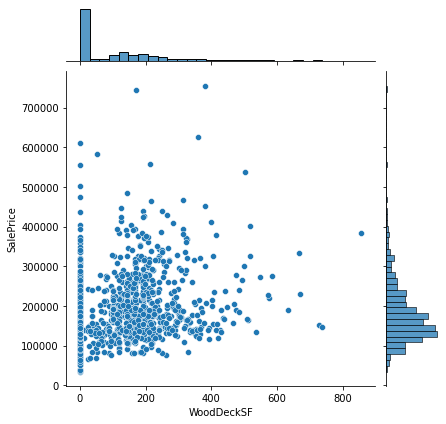

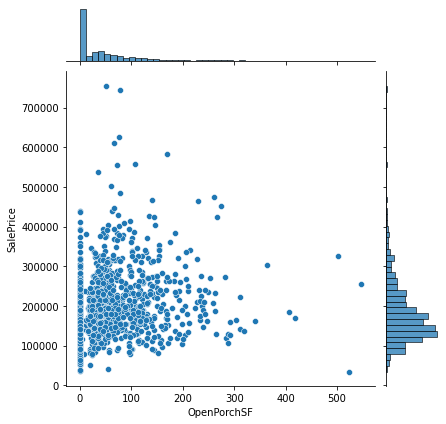

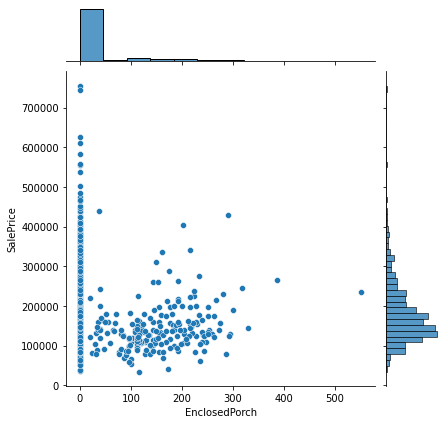

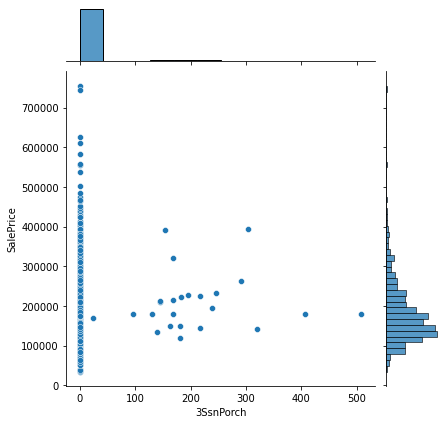

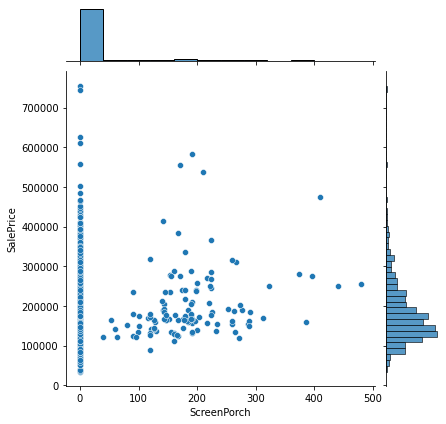

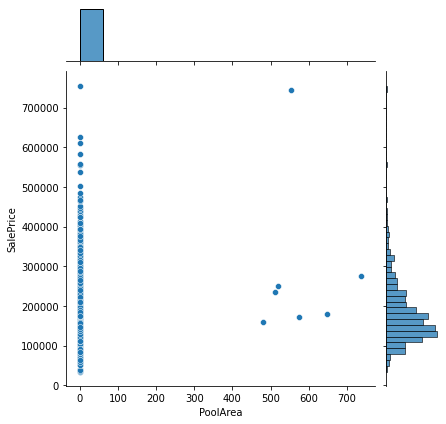

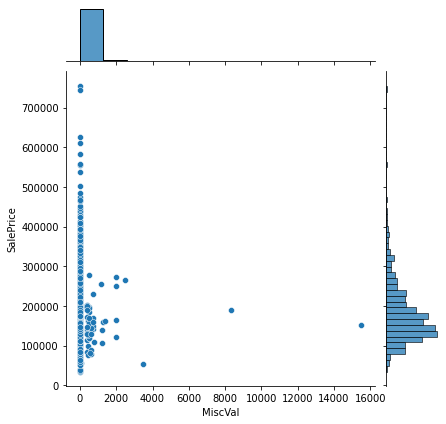

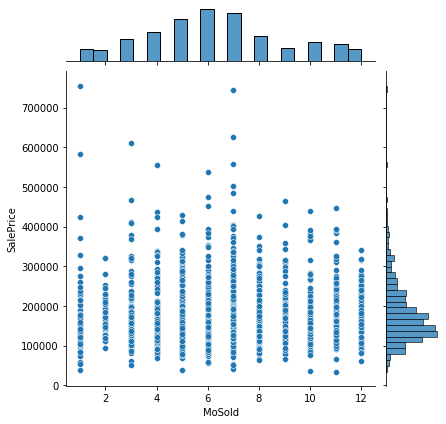

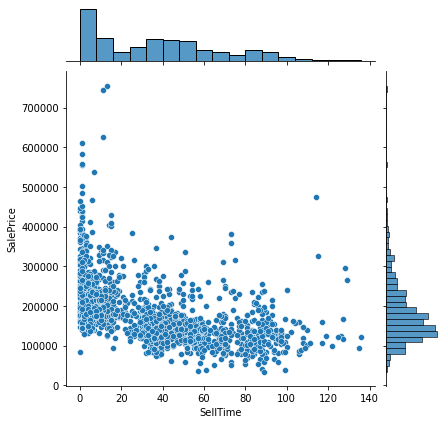

In [23]:
# Show Correlation Each of numeric Columnns with 'SalePrice' and find outlier
for i in numeric_col:
    sns.jointplot(x = d_house[i], y = d_house['SalePrice'])
    plt.show()

__Based on the correlation graph, we can select the column to delete and select the column to remove the Outliers__

In [24]:
del_col=['MoSold','YearRemodAdd','GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt']
rm_outlier = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','MiscVal','SellTime']

In [25]:
# Define function to clear Outlier
def remove_outlier(df, col=None):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR)&(df[col] <= Q3 + 1.5*IQR)]
    return df

In [26]:
for i in del_col:
    d_house = d_house.drop(i,axis=1)

In [27]:
for i in rm_outlier:
    d_house = remove_outlier(d_house,i)

In [28]:
d_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1056 non-null   int64  
 1   LotFrontage    1056 non-null   float64
 2   LotArea        1056 non-null   int64  
 3   OverallQual    1056 non-null   int64  
 4   OverallCond    1056 non-null   int64  
 5   MasVnrArea     1056 non-null   float64
 6   BsmtFinSF1     1056 non-null   int64  
 7   BsmtFinSF2     1056 non-null   int64  
 8   TotalBsmtSF    1056 non-null   int64  
 9   1stFlrSF       1056 non-null   int64  
 10  2ndFlrSF       1056 non-null   int64  
 11  LowQualFinSF   1056 non-null   int64  
 12  GrLivArea      1056 non-null   int64  
 13  BsmtFullBath   1056 non-null   int64  
 14  BsmtHalfBath   1056 non-null   int64  
 15  FullBath       1056 non-null   int64  
 16  HalfBath       1056 non-null   int64  
 17  BedroomAbvGr   1056 non-null   int64  
 18  KitchenA

>> After deleting the column for the first time and removing the noise, the data has reduced Shape to : 1056 rows 73 columns.

In [29]:
# Find columns with few values and high disparity
Cleast = []
for i in d_house.columns.tolist():
    if len(d_house[i].value_counts())<=3:
        Cleast.append(i)

In [30]:
for i in Cleast:
    print(i,'\n', d_house[i].value_counts())
    print('-+'*20)

BsmtHalfBath 
 0    997
1     57
2      2
Name: BsmtHalfBath, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
HalfBath 
 0    697
1    350
2      9
Name: HalfBath, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
PoolArea 
 0      1054
648       1
576       1
Name: PoolArea, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
MiscVal 
 0    1056
Name: MiscVal, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Street 
 Pave    1055
Grvl       1
Name: Street, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Alley 
 non     987
Grvl     41
Pave     28
Name: Alley, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Utilities 
 AllPub    1056
Name: Utilities, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
LandSlope 
 Gtl    1016
Mod      37
Sev       3
Name: LandSlope, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
CentralAir 
 Y    986
N     70
Name: CentralAir, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
PavedDrive 
 Y    967
N     67
P    

>_Based on the above results, we select a few columns to delete combined with the meaning of the columns, </br>we will delete a few more columns below._

In [31]:
del_ID = ['PoolArea','MiscVal','Utilities','Street','PoolQC','MiscFeature']
not_meaning = ['Alley','Condition2','Heating','GarageCond','Fence','Functional','LandContour','LandSlope',
               'BldgType','RoofMatl','BsmtCond','CentralAir','GarageQual','PavedDrive','ExterCond','BsmtFinType2']

del_ID+=not_meaning
d_house = d_house.drop(del_ID, axis=1)

In [32]:
d_house = d_house.reset_index(drop=True)
d_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,No,GLQ,Ex,SBrkr,Gd,non,Attchd,RFn,WD,Normal
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,Gd,ALQ,Ex,SBrkr,TA,TA,Attchd,RFn,WD,Normal
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,Mn,GLQ,Ex,SBrkr,Gd,TA,Attchd,RFn,WD,Normal
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,No,ALQ,Gd,SBrkr,Gd,Gd,Detchd,Unf,WD,Abnorml
4,20,75.0,10084,8,5,186.0,1369,0,1686,1694,...,Av,GLQ,Ex,SBrkr,Gd,Gd,Attchd,RFn,WD,Normal


In [33]:
d_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1056 non-null   int64  
 1   LotFrontage    1056 non-null   float64
 2   LotArea        1056 non-null   int64  
 3   OverallQual    1056 non-null   int64  
 4   OverallCond    1056 non-null   int64  
 5   MasVnrArea     1056 non-null   float64
 6   BsmtFinSF1     1056 non-null   int64  
 7   BsmtFinSF2     1056 non-null   int64  
 8   TotalBsmtSF    1056 non-null   int64  
 9   1stFlrSF       1056 non-null   int64  
 10  2ndFlrSF       1056 non-null   int64  
 11  LowQualFinSF   1056 non-null   int64  
 12  GrLivArea      1056 non-null   int64  
 13  BsmtFullBath   1056 non-null   int64  
 14  BsmtHalfBath   1056 non-null   int64  
 15  FullBath       1056 non-null   int64  
 16  HalfBath       1056 non-null   int64  
 17  BedroomAbvGr   1056 non-null   int64  
 18  KitchenA

#### Check Target Variable

[]

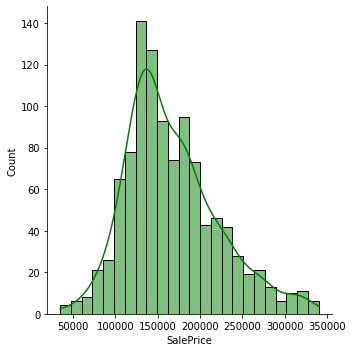

In [34]:
sns.displot(d_house['SalePrice'],color='green', kde=True)
plt.plot()

[]

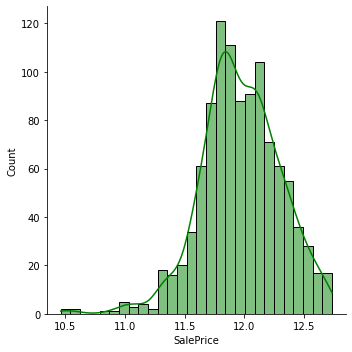

In [35]:
# value is too large, log1p should be normalized (0 to infinity)
d_house['SalePrice']=np.log1p(d_house['SalePrice'])
sns.displot(d_house['SalePrice'],color='green', kde=True)
plt.plot()

>__Now, we deal with columns whose data type is object__

In [36]:
# Dummies value conver string to numeric
d_house = pd.get_dummies(d_house, drop_first=True )
d_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,20,75.0,10084,8,5,186.0,1369,0,1686,1694,...,0,0,0,0,1,0,0,0,1,0


In [37]:
d_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Columns: 170 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(25), uint8(142)
memory usage: 377.6 KB


__** Finally, after the Dummies step, we have a complete dataset for the Training step.__

In [38]:
# Select Data
X = d_house.drop(['SalePrice'], axis=1)
y = d_house['SalePrice']
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,20,75.0,10084,8,5,186.0,1369,0,1686,1694,...,0,0,0,0,1,0,0,0,1,0


In [39]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.634606
Name: SalePrice, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train:',len(X_train))
print('X_test:',len(X_test))

X_train: 844
X_test: 212


In [41]:
# Get all columns have dtype = ['float64', 'int64'] for Scaling
scl_col = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(scl_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SellTime']


In [42]:
# Because the columns have many different values too big, we can't use MinMaxScaler() instead, we use StandardScaler()
scaler = StandardScaler()
X_train[scl_col] = scaler.fit_transform(X_train[scl_col])
X_test[scl_col] = scaler.fit_transform(X_test[scl_col])

In [43]:
# Check with RFE and select useful columns for training. Check with 100 Cols
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 100)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 2),
 ('FullBath', False, 2),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', False, 2),
 ('Fireplaces', False, 2),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 2),
 ('SellTime', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 2),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 2),
 ('LotConfig_CulDSac', False, 2),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3',

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'SellTime', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR2',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_MetalSd', 

In [45]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_NPkVill', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Condition1_Feedr', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Gambrel',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', '

In [46]:
# Create X_train_rfe dataframe from RFE Module
X_train_rfe = X_train[col]
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()


,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SellTime,MSZoning_FV,MSZoning_RH,...,GarageType_non,GarageFinish_non,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
758,0.037017,0.329810,-0.695006,0.077296,1.335483,-0.117225,1.307243,0.155778,0,0,...,0,0,0,0,0,1,0,0,1,0
442,2.440256,-0.551075,1.353511,1.263618,0.909736,-0.117225,1.718227,-0.934781,0,0,...,0,0,0,0,0,1,0,0,1,0
362,0.838096,2.091580,1.553767,2.368359,-0.756335,-0.117225,0.896260,0.412380,0,0,...,0,0,0,0,0,1,0,0,1,0
377,-0.764063,1.210695,-0.327323,-0.599146,-0.756335,-0.117225,-1.142312,0.412380,0,0,...,0,0,0,0,0,1,0,0,1,0
327,-0.764063,-0.551075,-1.325319,-1.632504,1.015558,-0.117225,-0.170896,1.727465,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_train_rfe.shape

(844, 84)

In [48]:
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9293833285118362

In [49]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-6.327408900042208e+18

* __'r2_score' TEST is too small(-6.327408900042208e+18)compared to 'r2_score' TRAIN which is too high(0.9293833285118362).</br> This is not a good option for Using__
### Next step is to test and train with Lasso and Ridge Regression

## <center> Ridge Regression </center>

In [50]:
# Get hyperparameter alpha
params = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
ridge = Ridge()

In [51]:
# Cross validation with 5 folds
# Fit training set into model
folds = 5
ridg_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

ridg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6,
                                   0.8, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
# Creating dataframe and Check after fit model
ridg_rs = pd.DataFrame(ridg_cv.cv_results_)
ridg_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011191,0.003567,0.004020,0.000046,0.001,{'alpha': 0.001},0.863120,0.873564,0.870552,0.855725,...,0.864454,0.006702,19,0.931636,0.934637,0.935150,0.935954,0.934929,0.934461,0.001479
1,0.009057,0.000560,0.004009,0.000031,0.005,{'alpha': 0.005},0.863692,0.873662,0.870971,0.855794,...,0.864739,0.006726,18,0.931634,0.934636,0.935149,0.935953,0.934928,0.934460,0.001479
2,0.008888,0.000107,0.004177,0.000459,0.01,{'alpha': 0.01},0.864388,0.873779,0.871462,0.855872,...,0.865078,0.006762,17,0.931630,0.934634,0.935144,0.935951,0.934924,0.934457,0.001479
3,0.009468,0.000331,0.003647,0.000446,0.05,{'alpha': 0.05},0.869324,0.874574,0.874445,0.856248,...,0.867294,0.007206,16,0.931524,0.934575,0.935028,0.935895,0.934836,0.934372,0.001491
4,0.009818,0.005767,0.004536,0.005772,0.1,{'alpha': 0.1},0.874251,0.875355,0.876749,0.856333,...,0.869255,0.007968,15,0.931264,0.934433,0.934765,0.935757,0.934632,0.934170,0.001523


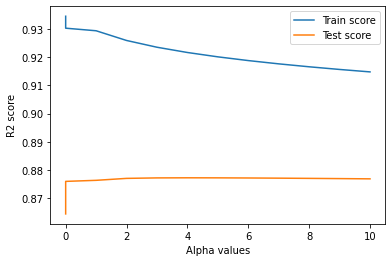

In [53]:
ridg_rs['param_alpha'] = ridg_rs['param_alpha'].astype('int32')
plt.plot(ridg_rs['param_alpha'], ridg_rs['mean_train_score'])
plt.plot(ridg_rs['param_alpha'], ridg_rs['mean_test_score'])
plt.legend(['Train score', 'Test score'])
plt.xlabel('Alpha values')
plt.ylabel('R2 score')
plt.show()

In [54]:
# Get the best alpha value
best_Alpha = ridg_cv.best_params_
best_Alpha

{'alpha': 4.0}

In [55]:
# ReFitting with the Best Alpha
ridg_cv = Ridge(alpha=best_Alpha['alpha'])
ridg_cv.fit(X_train, y_train)

Ridge(alpha=4.0)

In [56]:
y_train_pred = ridg_cv.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.9185922756497775


In [57]:
y_test_pred = ridg_cv.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8752370770554132


In [58]:
ridg_cv_hyperparam = list(ridg_cv.coef_)
ridg_cv_hyperparam.insert(0, ridg_cv.intercept_)
ridg_cv_hyperparam = [i for i in ridg_cv_hyperparam]

cols = X_train.columns
cols = cols.insert(0,'constant')
hyper_list = list(zip(cols, ridg_cv_hyperparam))
hyper_list[:20]

[('constant', 11.839197682032617),
 ('MSSubClass', -0.0034560631332242243),
 ('LotFrontage', 0.004313967398433534),
 ('LotArea', 0.02263436738479862),
 ('OverallQual', 0.06879175839962963),
 ('OverallCond', 0.06495300594434293),
 ('MasVnrArea', -0.005017588037365432),
 ('BsmtFinSF1', 0.02302561771243312),
 ('BsmtFinSF2', 0.004832976895027577),
 ('TotalBsmtSF', 0.045731838514649334),
 ('1stFlrSF', 0.022780219276585235),
 ('2ndFlrSF', 0.04616439472551446),
 ('LowQualFinSF', 0.002408340955746686),
 ('GrLivArea', 0.059721471714675275),
 ('BsmtFullBath', 0.011546380623235436),
 ('BsmtHalfBath', -0.000415415255861418),
 ('FullBath', 0.009277231647743652),
 ('HalfBath', 0.008916060341993652),
 ('BedroomAbvGr', 0.005921085954761183),
 ('KitchenAbvGr', -0.007804118331803871)]

In [59]:
hyper_list = pd.DataFrame({'Hyperparams':cols, 'Coef':ridg_cv_hyperparam})
hyper_list.sort_values('Coef', ascending=False).head(5)

,Hyperparams,Coef
0,constant,11.839198
42,Neighborhood_Crawfor,0.130436
30,MSZoning_RL,0.106723
29,MSZoning_RH,0.099432
31,MSZoning_RM,0.094931


* We see that, compared to using RFE, the results of Ridge Regression have been much better.</br>The score between y_train_pred=0.918 and y_test_pred=0.875 can also confirm that the model just created is not too complicated, nor too simple, it can avoid overfitting and underfiting.
* However, let's try with Lasso Regression

## <center> Lasso Regression </center>

__

In [60]:
# Similar to Ridge Regression, we also operate with Lasso regression
# Get hyperparameter alpha
params = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 1.0,2.0, 10.0]}
lasso = Lasso()

In [61]:
lass_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
lass_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 1.0, 2.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
lasso_rs = pd.DataFrame(lass_cv.cv_results_)
lasso_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.104672,0.039425,0.004413,0.000564,0.00001,{'alpha': 1e-05},0.867678,0.875971,0.872795,0.858016,...,0.867228,0.006682,5,0.931551,0.934564,0.935090,0.935878,0.934842,0.934385,0.001483
1,0.043247,0.005471,0.004699,0.001058,0.00005,{'alpha': 5e-05},0.882112,0.881260,0.879174,0.861398,...,0.874181,0.008408,4,0.930388,0.933608,0.934231,0.934860,0.933868,0.933391,0.001559
2,0.081682,0.009693,0.004044,0.000125,0.0001,{'alpha': 0.0001},0.892341,0.884298,0.883271,0.862497,...,0.878408,0.010794,2,0.928354,0.932115,0.932278,0.933046,0.932359,0.931631,0.001669
3,0.027218,0.002079,0.003777,0.000217,0.0005,{'alpha': 0.0005},0.907406,0.891681,0.876294,0.848046,...,0.877882,0.020476,3,0.910370,0.915469,0.914073,0.918113,0.915651,0.914735,0.002541
4,0.014333,0.001699,0.002161,0.001776,0.001,{'alpha': 0.001},0.908693,0.891162,0.878754,0.851464,...,0.878535,0.020277,1,0.897184,0.900672,0.905105,0.906923,0.906642,0.903305,0.003791


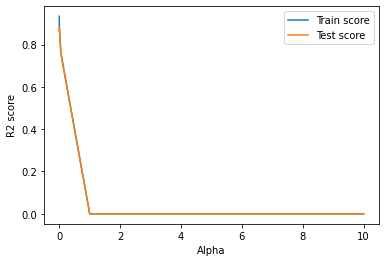

In [63]:
plt.plot(lasso_rs['param_alpha'], lasso_rs['mean_train_score'])
plt.plot(lasso_rs['param_alpha'], lasso_rs['mean_test_score'])
plt.legend(['Train score', 'Test score'])
plt.xlabel('Alpha')
plt.ylabel('R2 score')
plt.show()

In [64]:
best_Alpha = lass_cv.best_params_
best_Alpha

{'alpha': 0.001}

In [65]:
model_lasso = Lasso(best_Alpha['alpha'])
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [66]:
y_train_pred = model_lasso.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.9000713193500549


In [67]:
y_test_pred = model_lasso.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8828972612311579


In [68]:
lass_cv_hyperparam = list(model_lasso.coef_)
lass_cv_hyperparam.insert(0, model_lasso.intercept_)
lass_cv_hyperparam = [i for i in lass_cv_hyperparam]

cols = X_train.columns
cols = cols.insert(0,'constant')
hyper_list = list(zip(cols, lass_cv_hyperparam))
hyper_list = pd.DataFrame({'Hyperparams':cols, 'Coef':lass_cv_hyperparam})
hyper_list.sort_values('Coef', ascending=False).head(5)

,Hyperparams,Coef
0,constant,11.885954
42,Neighborhood_Crawfor,0.118768
13,GrLivArea,0.105098
4,OverallQual,0.080695
5,OverallCond,0.065085


* _We see that Lasso regression has a little difference in results compared to Ridge Regression.</br>Score increased in test data but decreased in train data, but the increase or decrease value was not significant.</br>However, looking at the results of the two types of regression Ridge and Lasso, we see that the model has found the best Alpha values and avoid the situation of Overfiting and Underfiting.
* __In conclusion, with this model, we can apply it to predict house prices with real data__